
 IRIS DATA : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5

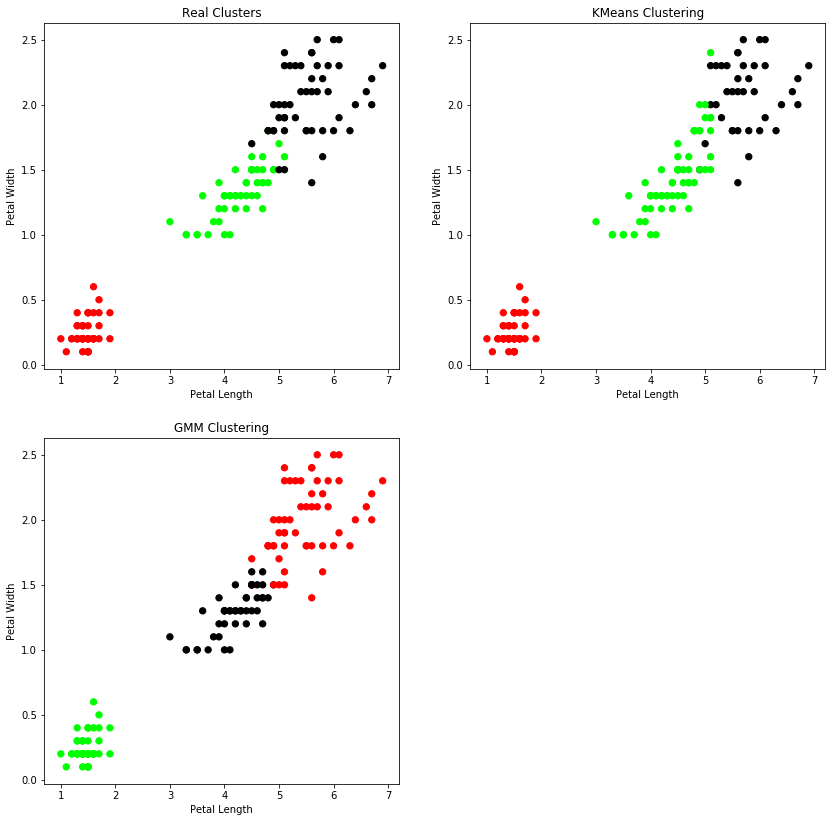

In [1]:
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd 
import numpy as np
%matplotlib inline

#import some data to play
iris = datasets.load_iris()
print("\n IRIS DATA :",iris.data);
#print("\n IRIS FEATURES :\n",iris.feature_names) 
#print("\n IRIS TARGET :\n",iris.target) 
#print("\n IRIS TARGET NAMES:\n",iris.target_names) 

# Store the inputs as a Pandas Dataframe and set the column names 
X = pd.DataFrame(iris.data) 

#print(X)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

#print(X.columns) 
#print("X:",x) 
#print("Y:",y)
y = pd.DataFrame(iris.target) 
y.columns = ['Targets'] 

# Build the K Means Model 
model = KMeans(n_clusters=3) 
model.fit(X) 
#model.labels_ #: Gives cluster no for Which samples belongs to
#Visualise the clustering results 

# Set the size of the plot 
plt.figure(figsize=(14,14)) 

# Create a colormap 
colormap = np.array(['red', 'lime', 'black']) 

#Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters') 
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width') 

# Plot the KMeans Models Classifications 
plt.subplot(2, 2, 2) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('KMeans Clustering') 
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width') 
sm1=sm.accuracy_score(y, model.labels_)
print(sm1)
print(sm.confusion_matrix(y, model.labels_)) 


# General EM for GMM
from sklearn import preprocessing 
# transform your data such that its distribution will have a 
#K mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler() 
scaler.fit(X) 
xsa = scaler.transform(X) 
xs = pd.DataFrame(xsa, columns = X.columns) 

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3) 
gmm.fit(xs)
gmm_y = gmm.predict(xs)
#print(gmm_y)
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
print(sm.accuracy_score(y, gmm_y))

print(sm.confusion_matrix(y, gmm_y))

print('Observation: GMM using EM algorithm based clustering matched the true labels more closely than the KMmeans.')